In [1]:
from CLasso import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
To generate the data :
'''

m,d,d_nonzero,k,sigma =100,200,5,5,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)

In [3]:
'''
To define the problem :
'''

problem = classo_problem(X,y,C)

In [4]:
'''
To solve the problem with its default parameters :
'''
problem.solve()

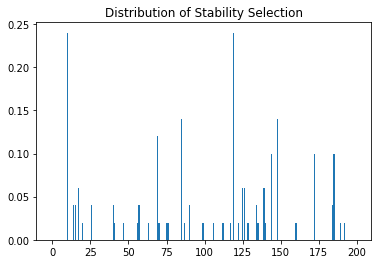

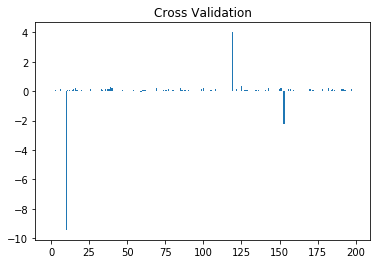

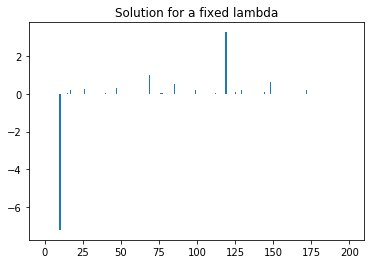

 Running time for CV       : 4.001s 
 Running time for SS       : 0.778s 
 Running time for LAMfixed : 0.052s


dict_keys(['beta_CV', 'distribution_SS', 'beta_LAMfixed', 'sigma_CV', 'sigma_LAMfixed', 'time_CV', 'time_SS', 'time_LAMfixed', 'lambdamax'])

In [5]:
'''
To plot the solutions, as graph, or to see all its components :
'''


print(problem.solution)

problem.solution.__dict__.keys()

In [6]:
'''
To see the variables in problem, 
then one can just print one of the components of problem : problem.data for example
'''

problem.__dict__.keys()

dict_keys(['data', 'problem_formulation', 'model_selection', 'solution'])

In [7]:
'''
To see the formulation of the problem, either as a dictionary or as a string
'''
print(problem.problem_formulation)

problem.problem_formulation.__dict__

Concomitant


{'huber': False, 'concomitant': True, 'rho': 1.345}

In [8]:
'''
To see the model selection, either as a dictionary or as a string 
'''


print(problem.model_selection)

problem.model_selection.__dict__

CV,  SS,  LAMfixed


{'CV': True,
 'CVparameters': Nsubset = 5  lamin = 0.01;  numerical_method = ODE,
 'SS': True,
 'SSparameters': method = first;  lamin = 0.01;  B = 50;  q = 10;  pourcent_nS = 0.5;  numerical_method = ODE,
 'LAMfixed': True,
 'LAMparameters': lam = theoritical;  theoritical_lam = 0.448;  numerical_method = ODE}

In [9]:
'''
To know what are the Stability Selection parameters :
(also works for Cross Validation parameters, or fixed Lam parameters)
'''

problem.model_selection.SSparameters.__dict__

{'seed': 1,
 'problem_formulation': Concomitant,
 'numerical_method': 'ODE',
 'method': 'first',
 'B': 50,
 'q': 10,
 'pourcent_nS': 0.5,
 'lamin': 0.01,
 'hd': False,
 'lam': 'theoritical',
 'theoritical_lam': 0.6337}

In [10]:
'''
To get a parameter of the solution :
'''
print("sigma     = ", problem.solution.sigma_LAMfixed)
print("lambdamax = ", problem.solution.lambdamax)

sigma     =  3.1700577116568014
lambdamax =  1.0072233211654693


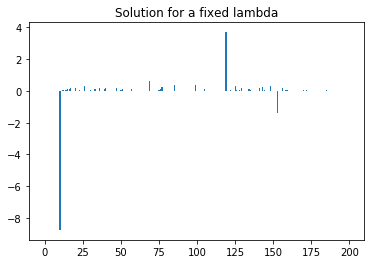

 Running time for CV       : 0s 
 Running time for SS       : 0s 
 Running time for LAMfixed : 17.569s

In [11]:
'''
To solve a problem different than the default parameters :

'''
problem = classo_problem(X,y)
formulation = problem.problem_formulation
formulation.huber = True
formulation.concomitant = False


MS = problem.model_selection
MS.SS = False
MS.CV = False

param = MS.LAMparameters
param.lam = 0.1
param.numerical_method = '2prox'
problem.solve()
problem.solution

In [12]:
'''
To show that the CV (also works for SS) depends only on the seed we choose :

'''
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution



MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution

b1, b2, b3 = solution1.beta_CV, solution2.beta_CV, solution3.beta_CV 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.14493341965848222
